# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [43]:
# Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv("data/fashion-small.csv")

### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(normalize=True)

Sandal         0.107667
Trouser        0.102000
Ankle boot     0.100833
Shirt          0.100167
Pullover       0.099667
Coat           0.099500
T-shirt/top    0.098333
Dress          0.097500
Bag            0.097333
Sneaker        0.097000
Name: label, dtype: float64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 
pix_cols = df.columns
pix_cols = list(pix_cols)
pix_cols.remove('label')
print(pix_cols)

# Convert the all columns object into a regular list


# Sanity check that it is now just a list.


# Remove the label column from the list



['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

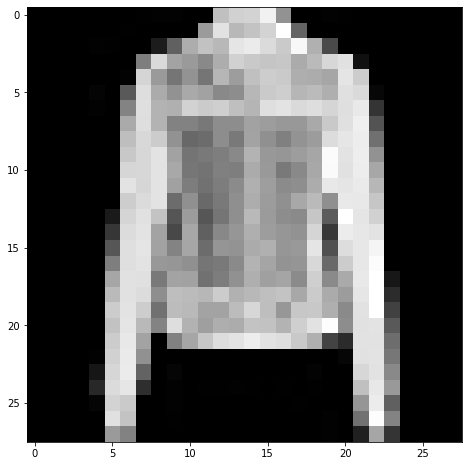

In [7]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pix_cols].values

# Select just one image from all the images
img = imgs[8]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [8]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = pix_cols


# Convert the all columns object into a regular list


# Sanity check that it is now just a list.


# Remove the label column from the list
# This happnes 'in place'


### 2. Define our `X` and `y`

In [9]:
# 2. Define our `X` and `y` data. 

X = df[pix_cols]

y = df['label']

### 3. Train-test-split our `X` and `y` data

In [10]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [11]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [12]:
# 2. Fit that model with our training data. 
model.fit(X_train,y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [13]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.832000


### 2. Make new predictions using our test data. 

In [14]:
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)


### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [15]:
### 3. Print the classification report. 

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Ankle boot       0.90      0.91      0.91       152
         Bag       0.93      0.94      0.94       163
        Coat       0.71      0.76      0.74       141
       Dress       0.80      0.88      0.84       163
    Pullover       0.76      0.73      0.74       152
      Sandal       0.92      0.92      0.92       147
       Shirt       0.68      0.55      0.61       148
     Sneaker       0.89      0.87      0.88       127
 T-shirt/top       0.74      0.81      0.77       151
     Trouser       0.99      0.92      0.95       156

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



### 4. Plot the confusion matrix of our predicted results. 

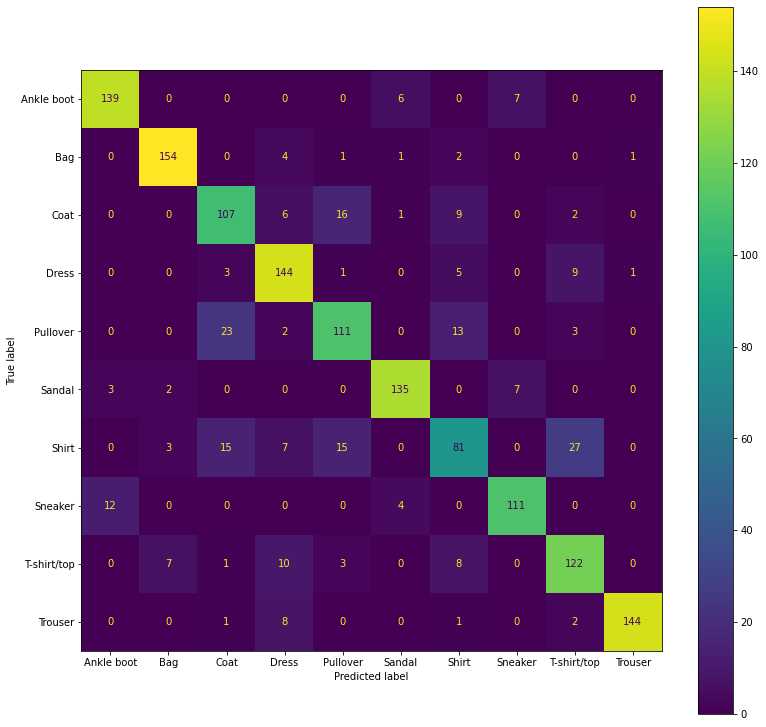

In [16]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model,X=X_test, y_true=y_test, ax=ax)


### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [17]:
print('The classifier mistaked shirt and t_shirt/top the most.')

The classifier mistaked shirt and t_shirt/top the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [18]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    fig, ax = plt.subplots(figsize=(13,13))
    metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

C:\Users\changc42\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Ankle boot       0.91      0.94      0.92       122
         Bag       0.93      0.92      0.93       121
        Coat       0.69      0.75      0.72       115
       Dress       0.82      0.82      0.82       120
    Pullover       0.75      0.71      0.73       133
      Sandal       0.95      0.86      0.91       140
       Shirt       0.57      0.55      0.56       121
     Sneaker       0.84      0.88      0.86       117
 T-shirt/top       0.71      0.76      0.74       113
     Trouser       0.96      0.94      0.95        98

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



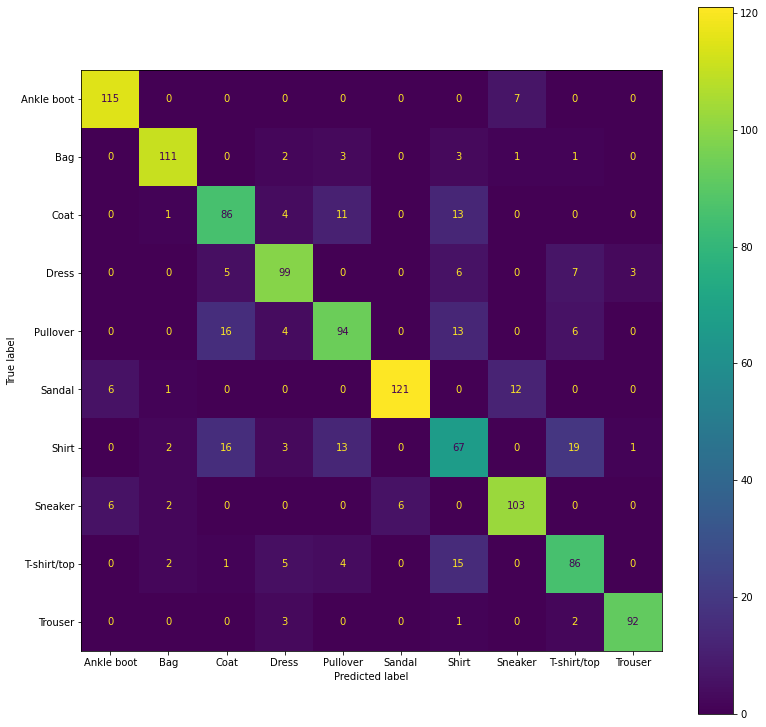

In [23]:
# LogisticRegression
log_reg_model = LogisticRegression()
build_and_eval_model(log_reg_model, X, y, random_state=23)

              precision    recall  f1-score   support

  Ankle boot       0.92      0.89      0.91       122
         Bag       0.90      0.96      0.93       121
        Coat       0.71      0.83      0.76       115
       Dress       0.84      0.90      0.87       120
    Pullover       0.78      0.74      0.76       133
      Sandal       0.96      0.92      0.94       140
       Shirt       0.65      0.50      0.56       121
     Sneaker       0.86      0.91      0.88       117
 T-shirt/top       0.78      0.81      0.79       113
     Trouser       0.96      0.95      0.95        98

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.84      0.84      0.83      1200



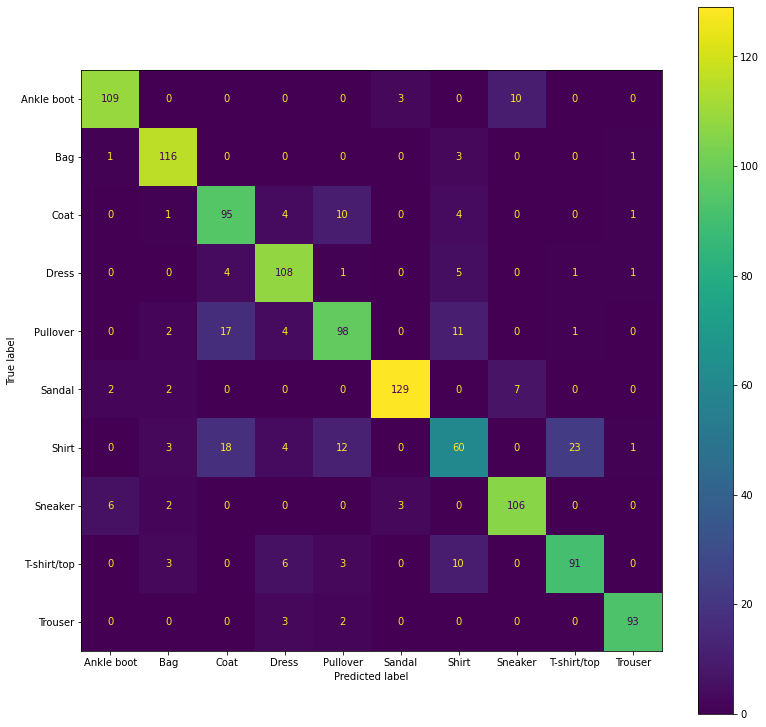

In [42]:
# RandomForest
rand_model = RandomForestClassifier()

build_and_eval_model(rand_model, X, y, random_state=23)

              precision    recall  f1-score   support

  Ankle boot       0.69      0.85      0.76       122
         Bag       0.88      0.85      0.87       121
        Coat       0.42      0.55      0.47       115
       Dress       0.67      0.90      0.77       120
    Pullover       0.65      0.60      0.62       133
      Sandal       0.79      0.08      0.14       140
       Shirt       0.33      0.14      0.20       121
     Sneaker       0.51      0.93      0.66       117
 T-shirt/top       0.73      0.81      0.76       113
     Trouser       0.96      0.89      0.92        98

    accuracy                           0.64      1200
   macro avg       0.66      0.66      0.62      1200
weighted avg       0.66      0.64      0.60      1200



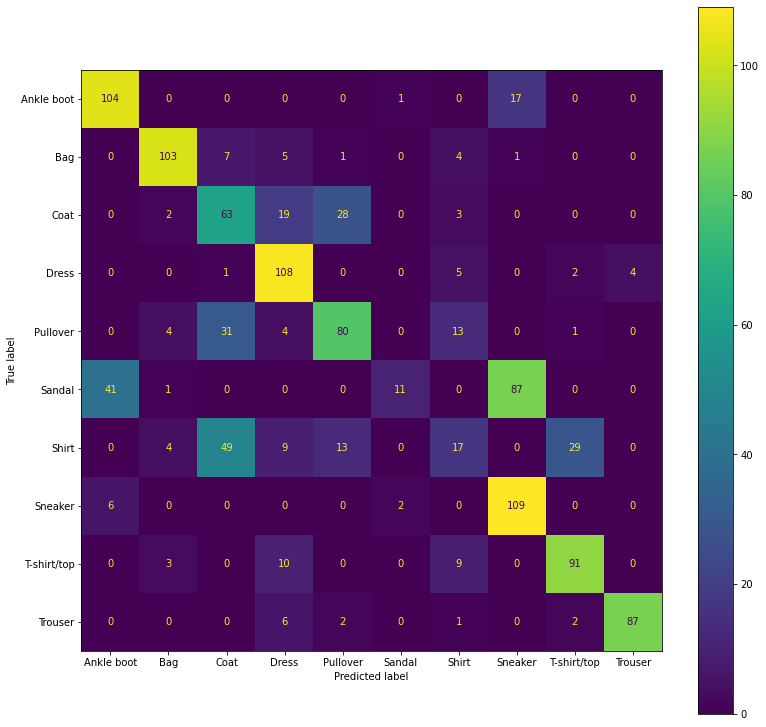

In [44]:
# MultinomialNB
mnb = MultinomialNB()

build_and_eval_model(mnb, X, y, random_state=23)

In [45]:
print('Log reg and random forest did roughly the same while multinomialNB did worst')

Log reg and random forest did roughly the same while multinomialNB did worst
